Task 7

Jared-from-Subway - Tier 2

You are click trading a newly launched memecoin and notice you are being sandwiched by Jared (https://etherscan.io/address/0x6b75d8af000000e20b7a7ddf000ba900b4009a80). (https://etherscan.io/address/0x6b75d8af000000e20b7a7ddf000ba900b4009a80) You see that Jared made a bunch of money doing this, and you're interested in checking their profitability:

 • a) Produce the code to calculate Jared’s revenue.

 • b) Produce the code to calculate Jared’s costs and use this to:

 ◦ Compute their profit.

 ◦ Identify the opportunity that yielded the highest single profit.
 
 • c) How can you avoid being sandwiched in the future? Provide some reasons that might explain why Jared is out-competing other sandwich enjoyers.

## In first we need to download data of all jared eth deals. I used bitquery.io api to do it and saved dataset on google drive

In [17]:
import pandas as pd
import gdown

# URL of the Google Drive file
url = 'https://drive.google.com/uc?id=1vSvzgOMGZL7KM177MrJtldeDryWJiBeZ'

# Download the file
output = 'downloaded_dataframe.pkl'
gdown.download(url, output, quiet=False)

# Load the DataFrame from the downloaded pickle file
df_downloaded = pd.read_pickle(output, compression='gzip')

# Display the first few rows of the downloaded DataFrame
print("First few rows of the downloaded DataFrame:")
print(df_downloaded.head())

# Display basic information about the downloaded DataFrame
print("\nInformation about the downloaded DataFrame:")
print(df_downloaded.info())

Downloading...
From (original): https://drive.google.com/uc?id=1vSvzgOMGZL7KM177MrJtldeDryWJiBeZ
From (redirected): https://drive.google.com/uc?id=1vSvzgOMGZL7KM177MrJtldeDryWJiBeZ&confirm=t&uuid=445a7bfa-b1cc-4741-979e-a8c1792dc67c
To: /home/newuser/cr1/pyth1/bit_download/downloaded_dataframe.pkl
100%|██████████| 445M/445M [00:04<00:00, 107MB/s] 


First few rows of the downloaded DataFrame:
  tradeIndex    protocol   buyAmount    sellAmount  count  \
0          5  Uniswap v2   23.702689  5.119933e+00      1   
1          5  Uniswap v2    5.119933  2.408243e+01      1   
2          4  Uniswap v2    0.623499  7.863402e+02      1   
3          4  Uniswap v2  786.340157  6.319207e-01      1   
4          4  Uniswap v2    0.565715  1.489555e+07      1   

  block.timestamp.time  block.height  \
0  2023-03-05 00:01:47      16758504   
1  2023-03-05 00:01:47      16758504   
2  2023-03-05 00:02:23      16758507   
3  2023-03-05 00:02:23      16758507   
4  2023-03-05 00:03:11      16758511   

                smartContract.address.address  \
0  0x4bacaaabe3e96959ddf3269d3092d5cea88fefe9   
1  0x4bacaaabe3e96959ddf3269d3092d5cea88fefe9   
2  0xc0a6bb3d31bb63033176edba7c48542d6b4e406d   
3  0xc0a6bb3d31bb63033176edba7c48542d6b4e406d   
4  0x9c0ff296b3ea128162359bab16b871e053a56519   

                          buyCurrency.address buyCurr

In [18]:
# Sort df_downloaded by block number, transaction index, and trade index
# Convert tradeIndex column from string to int
df_downloaded.loc[:, 'tradeIndex'] = df_downloaded['tradeIndex'].astype(int)

df_downloaded = df_downloaded.sort_values(by=['block.height', 'transaction.index', 'tradeIndex'])

# Reset the index after sorting
df_downloaded.reset_index(drop=True, inplace=True)

In [19]:
df_downloaded1=df_downloaded.copy()

## Lets calculate revenue of jared based on net weth operations

In [4]:
df_downloaded.head()
# Create new column 'eth_flow' based on conditions using pandas methods
df_downloaded['eth_flow'] = 0  # Initialize with default value

# Set values based on conditions
df_downloaded.loc[df_downloaded['buyCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'eth_flow'] = -df_downloaded['buyAmount']
df_downloaded.loc[df_downloaded['sellCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'eth_flow'] = df_downloaded['sellAmount']

# Display the first few rows to verify the new column
df_downloaded[['buyCurrency.address', 'sellCurrency.address', 'buyAmount', 'sellAmount', 'eth_flow']].tail(30)
# Add cumulative sum column based on eth_flow
df_downloaded['eth_flow_cumsum'] = df_downloaded['eth_flow'].cumsum()

# Display the first few rows to verify the new column
df_downloaded.head()

,tradeIndex,protocol,buyAmount,sellAmount,count,block.timestamp.time,block.height,smartContract.address.address,buyCurrency.address,buyCurrency.symbol,...,sellCurrency.symbol,transaction.hash,transaction.index,transaction.gas,transaction.gasPrice,transaction.gasValue,transaction.txFrom.address,transaction.txFrom.annotation,eth_flow,eth_flow_cumsum
0,5,Uniswap v2,23.702689,5.119933e+00,1,2023-03-05 00:01:47,16758504,0x4bacaaabe3e96959ddf3269d3092d5cea88fefe9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,...,XMON,0xc0f8e2fc69544364cc1d6bbe72be48f5f4bc311a96b6...,0,95319,21.130742,0.002014,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,None,-23.702689,-23.702689
1,5,Uniswap v2,5.119933,2.408243e+01,1,2023-03-05 00:01:47,16758504,0x4bacaaabe3e96959ddf3269d3092d5cea88fefe9,0x3aada3e213abf8529606924d8d1c55cbdc70bf74,XMON,...,WETH,0x9c2cd86cad018adb7abc0076cc452c53fd05500d17ff...,2,85545,4367.549989,0.373622,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,None,24.082426,0.379737
2,4,Uniswap v2,0.623499,7.863402e+02,1,2023-03-05 00:02:23,16758507,0xc0a6bb3d31bb63033176edba7c48542d6b4e406d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,...,RNDR,0x5dd066bd7615315fc915f576a216d8881fbfcde3e47e...,9,93654,20.695847,0.001938,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,None,-0.623499,-0.243762
3,4,Uniswap v2,786.340157,6.319207e-01,1,2023-03-05 00:02:23,16758507,0xc0a6bb3d31bb63033176edba7c48542d6b4e406d,0x6de037ef9ad2725eb40118bb1702ebb27e4aeb24,RNDR,...,WETH,0x907655a97a1a598bd65436ec28658b4d5f91063f56c2...,11,83880,77.194297,0.006475,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,None,0.631921,0.388159
4,4,Uniswap v2,0.565715,1.489555e+07,1,2023-03-05 00:03:11,16758511,0x9c0ff296b3ea128162359bab16b871e053a56519,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,...,shiBTC,0xff21542d38843ee622c5a7df043722baa244f49b039c...,1,84348,21.852797,0.001843,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,None,-0.565715,-0.177556


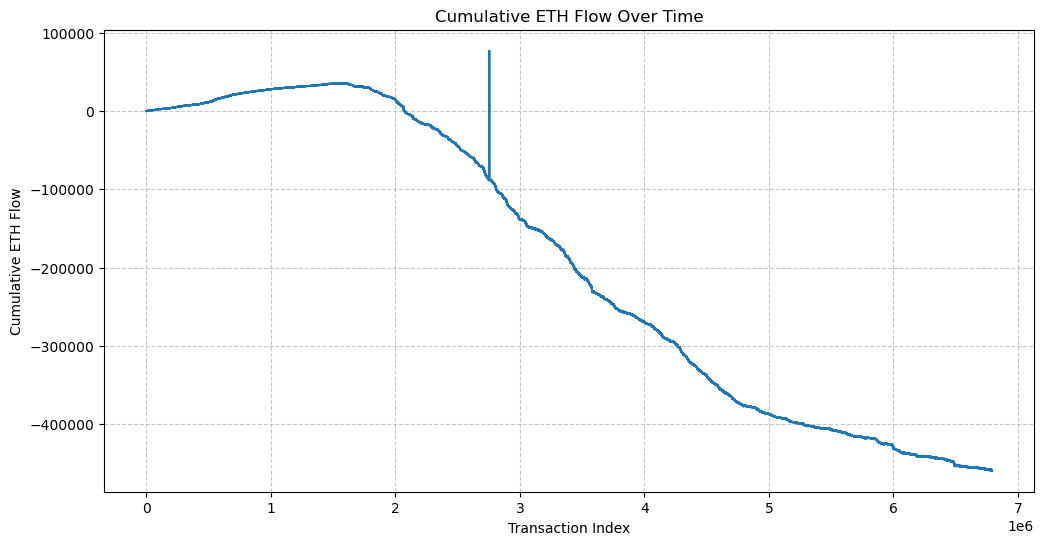

In [5]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the cumulative sum of eth_flow
plt.plot(df_downloaded.index, df_downloaded['eth_flow_cumsum'])

# Set labels and title
plt.xlabel('Transaction Index')
plt.ylabel('Cumulative ETH Flow')
plt.title('Cumulative ETH Flow Over Time')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Conclusion: Simple way warked for first trades but not for later, we need to try another way

### Solution: Because main revenue of jared is sandwiching we need to find all deals where he was buyer and seller at the same time with same token in the middle and same value of token. For si,plicity we use only weth and beginning and ending token, there are around 95% of sandwich deals with this pattern

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def process_transactions(df):
    # Pre-filter the DataFrame
    df_weth = df[(df['buyCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2') | (df['sellCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')]
    
    # Sort the DataFrame
    df_sorted = df_weth.sort_values(['block.height', 'transaction.index', 'tradeIndex'])
    
    result_list = []
    
    # Group by block height
    for _, block_group in tqdm(df_sorted.groupby('block.height'), desc="Processing blocks"):
        buy_trades = block_group[
            (block_group['buyCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2') & 
            (block_group['sellCurrency.address'] != '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')
        ]
        
        sell_trades = block_group[
            (block_group['sellCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2') & 
            (block_group['buyCurrency.address'] != '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')
        ]
        
        for _, buy in buy_trades.iterrows():
            potential_sells = sell_trades[
                (sell_trades['transaction.index'] > buy['transaction.index']) &
                (sell_trades['buyCurrency.address'] == buy['sellCurrency.address'])
            ]
            
            for _, sell in potential_sells.iterrows():
                if 0.99 <= sell['buyAmount'] / buy['sellAmount'] <= 1.01:
                    eth_spent = buy['buyAmount']
                    eth_received = sell['sellAmount']
                    profit = eth_received - eth_spent
                    total_gas = buy['transaction.gasValue'] + sell['transaction.gasValue']
                    
                    result_list.append({
                        'buy_hash': buy['transaction.hash'],
                        'sell_hash': sell['transaction.hash'],
                        'buy_block_height': buy['block.height'],
                        'sell_block_height': sell['block.height'],
                        'total_gas_value': total_gas,
                        'eth_received': eth_received,
                        'eth_spent': eth_spent,
                        'profit': profit
                    })
                    break
    
    return pd.DataFrame(result_list)

# Run the optimized function
result_df = process_transactions(df_downloaded)

# Print the results
print(result_df.head())

Processing blocks: 100%|██████████| 1580752/1580752 [27:59<00:00, 941.14it/s] 


                                            buy_hash  \
0  0xc0f8e2fc69544364cc1d6bbe72be48f5f4bc311a96b6...   
1  0x5dd066bd7615315fc915f576a216d8881fbfcde3e47e...   
2  0xff21542d38843ee622c5a7df043722baa244f49b039c...   
3  0xbf1a7fe3157f88fc0257c1e6ec936b4f295cbf96db2c...   
4  0x1ddc1d3de39289b98594c21ef929cc5f879cba6ebfb1...   

                                           sell_hash  buy_block_height  \
0  0x9c2cd86cad018adb7abc0076cc452c53fd05500d17ff...          16758504   
1  0x907655a97a1a598bd65436ec28658b4d5f91063f56c2...          16758507   
2  0x550a7cc88c71835459236358e1ad3278484c09e275bc...          16758511   
3  0xb86acbea0ae682175188f98c1c2667abd02be98f283d...          16758512   
4  0xcdfde6b745474b23bad2759ac9341d264c8855fa5ba3...          16758513   

   sell_block_height  total_gas_value  eth_received  eth_spent    profit  
0           16758504         0.375636     24.082426  23.702689  0.379737  
1           16758507         0.008413      0.631921   0.623499  0.00

In [15]:
result_df.head()

,buy_hash,sell_hash,buy_block_height,sell_block_height,total_gas_value,eth_received,eth_spent,profit,sanwich_revenue,sandwich_revenue
0,0xc0f8e2fc69544364cc1d6bbe72be48f5f4bc311a96b6...,0x9c2cd86cad018adb7abc0076cc452c53fd05500d17ff...,16758504,16758504,0.375636,24.082426,23.702689,0.379737,0.379737,0.379737
1,0x5dd066bd7615315fc915f576a216d8881fbfcde3e47e...,0x907655a97a1a598bd65436ec28658b4d5f91063f56c2...,16758507,16758507,0.008413,0.631921,0.623499,0.008422,0.388159,0.388159
2,0xff21542d38843ee622c5a7df043722baa244f49b039c...,0x550a7cc88c71835459236358e1ad3278484c09e275bc...,16758511,16758511,0.020890,0.586837,0.565715,0.021122,0.409281,0.409281
3,0xbf1a7fe3157f88fc0257c1e6ec936b4f295cbf96db2c...,0xb86acbea0ae682175188f98c1c2667abd02be98f283d...,16758512,16758512,0.025189,11.872365,11.847151,0.025214,0.434496,0.434496
4,0x1ddc1d3de39289b98594c21ef929cc5f879cba6ebfb1...,0xcdfde6b745474b23bad2759ac9341d264c8855fa5ba3...,16758513,16758513,0.041211,1.329001,1.297058,0.031943,0.466439,0.466439


In [7]:
result_df.to_pickle('result_df_sandwich_revenue.pkl', compression='gzip')

In [12]:
result_df['sandwich_revenue'] = result_df['profit'].cumsum()

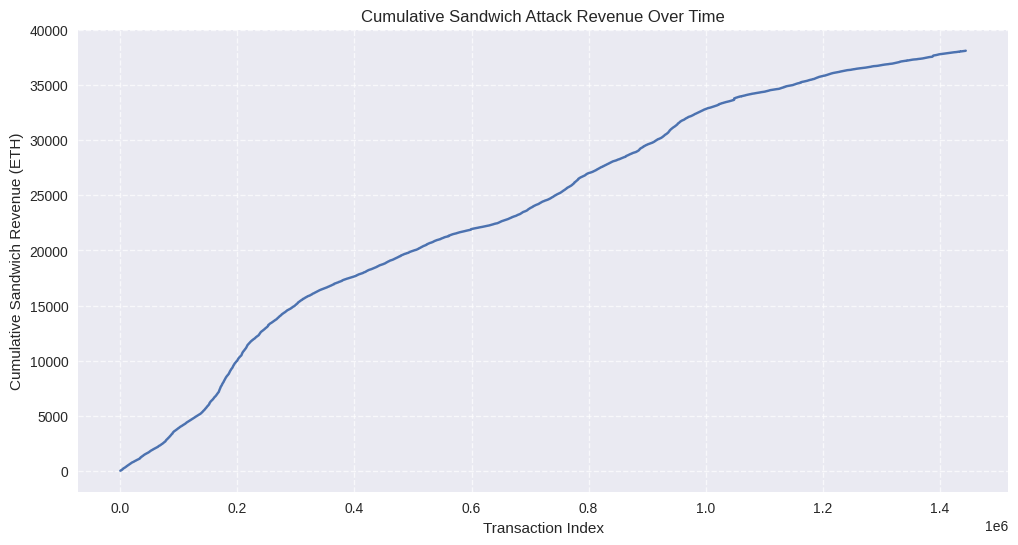

In [13]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the cumulative sum of sandwich revenue
plt.plot(result_df.index, result_df['sandwich_revenue'])

# Set labels and title
plt.xlabel('Transaction Index')
plt.ylabel('Cumulative Sandwich Revenue (ETH)')
plt.title('Cumulative Sandwich Attack Revenue Over Time')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [14]:
# Get the sandwich revenue of the last row
last_sandwich_revenue = result_df['sandwich_revenue'].iloc[-1]

# Print the result
print(f"Total sandwich attack revenue: {last_sandwich_revenue:.4f} ETH")


Total sandwich attack revenue: 38134.9422 ETH


### Answer for a) Produce the code to calculate Jared’s revenue: 
Total sandwich attack revenue: 38134.9422 ETH


### Problem with revenue is that it is not clear how much gas jared paid for each deal. Unfortunatelly jarred sometimes combine several sandwiches in one transaction and even combine it with multi routing arbitrage. Example is here https://etherscan.io/tx/0xa788778f1677da10e5554a07df0abd6253cdc53dceea9e1621841bde41b717e6. So to make clear calculation for at least of part of deals we will exclude all transaction which will have more than 1 trade in it. For this subset we can easily calculate gas cost for each deal.

In [20]:
df_downloaded=df_downloaded1.copy()

In [21]:
# Count the number of swaps in each transaction
swap_counts = df_downloaded.groupby('transaction.hash').size()

# Filter out transactions with more than one swap
single_swap_transactions = swap_counts[swap_counts == 1].index

# Keep only the rows with single swap transactions
df_downloaded = df_downloaded[df_downloaded['transaction.hash'].isin(single_swap_transactions)]

# Reset the index after filtering
df_downloaded.reset_index(drop=True, inplace=True)

print(f"Number of transactions after filtering: {len(df_downloaded)}")

Number of transactions after filtering: 1659806


In [22]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def process_transactions(df):
    # Pre-filter the DataFrame
    df_weth = df[(df['buyCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2') | (df['sellCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')]
    
    # Sort the DataFrame
    df_sorted = df_weth.sort_values(['block.height', 'transaction.index', 'tradeIndex'])
    
    result_list = []
    
    # Group by block height
    for _, block_group in tqdm(df_sorted.groupby('block.height'), desc="Processing blocks"):
        buy_trades = block_group[
            (block_group['buyCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2') & 
            (block_group['sellCurrency.address'] != '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')
        ]
        
        sell_trades = block_group[
            (block_group['sellCurrency.address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2') & 
            (block_group['buyCurrency.address'] != '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')
        ]
        
        for _, buy in buy_trades.iterrows():
            potential_sells = sell_trades[
                (sell_trades['transaction.index'] > buy['transaction.index']) &
                (sell_trades['buyCurrency.address'] == buy['sellCurrency.address'])
            ]
            
            for _, sell in potential_sells.iterrows():
                if 0.99 <= sell['buyAmount'] / buy['sellAmount'] <= 1.01:
                    eth_spent = buy['buyAmount']
                    eth_received = sell['sellAmount']
                    profit = eth_received - eth_spent
                    total_gas = buy['transaction.gasValue'] + sell['transaction.gasValue']
                    
                    result_list.append({
                        'buy_hash': buy['transaction.hash'],
                        'sell_hash': sell['transaction.hash'],
                        'buy_block_height': buy['block.height'],
                        'sell_block_height': sell['block.height'],
                        'total_gas_value': total_gas,
                        'eth_received': eth_received,
                        'eth_spent': eth_spent,
                        'profit': profit
                    })
                    break
    
    return pd.DataFrame(result_list)

# Run the optimized function
result_df = process_transactions(df_downloaded)

# Print the results
print(result_df.head())

Processing blocks: 100%|██████████| 847159/847159 [10:31<00:00, 1340.94it/s]


                                            buy_hash  \
0  0xc0f8e2fc69544364cc1d6bbe72be48f5f4bc311a96b6...   
1  0x5dd066bd7615315fc915f576a216d8881fbfcde3e47e...   
2  0xff21542d38843ee622c5a7df043722baa244f49b039c...   
3  0xbf1a7fe3157f88fc0257c1e6ec936b4f295cbf96db2c...   
4  0xdd0cd2f36f7539e892f4d8e4a6fcb938e49360ae5e31...   

                                           sell_hash  buy_block_height  \
0  0x9c2cd86cad018adb7abc0076cc452c53fd05500d17ff...          16758504   
1  0x907655a97a1a598bd65436ec28658b4d5f91063f56c2...          16758507   
2  0x550a7cc88c71835459236358e1ad3278484c09e275bc...          16758511   
3  0xb86acbea0ae682175188f98c1c2667abd02be98f283d...          16758512   
4  0xc883658ed771d16fe2b8bb792b578ad73961f5d34e4f...          16758520   

   sell_block_height  total_gas_value  eth_received  eth_spent    profit  
0           16758504         0.375636     24.082426  23.702689  0.379737  
1           16758507         0.008413      0.631921   0.623499  0.00

In [24]:
result_df['net_profit']=result_df['profit']-result_df['total_gas_value']


In [29]:
# Sort result_df by net_profit in descending order
result_df1 = result_df.sort_values(by='net_profit', ascending=False)

# Reset the index after sorting
result_df1 = result_df1.reset_index(drop=True)


In [30]:
result_df1.head()

,buy_hash,sell_hash,buy_block_height,sell_block_height,total_gas_value,eth_received,eth_spent,profit,net_profit
0,0xadef286836d4537a99245988f556cb28a349ecec8f2b...,0x37452170e57def3316e65116f94c4671a7480868d84f...,18884329,18884329,0.320148,503.984446,500.225891,3.758556,3.438408
1,0xc6bdbdfa43ae467a7b404c9b7d86893e4cb39ffdcf53...,0xd9b322bb1e209dbc7b6af9e2777d6260c00f93a4fd2f...,18584212,18584212,12.798755,1059.178856,1045.114321,14.064535,1.265780
2,0xd5077752960d04814161d8a99bd7c32d0b727e53f85c...,0x2c3b1c7ac00df945777f0f99f124ebf28b9365ccce7f...,18748244,18748244,17.068320,629.060813,611.094215,17.966598,0.898279
3,0xbe4a35b7caaab8d08027a7c48c3022c5463727203f2a...,0x28553c4f230063085f02a9782651773b15d87973f673...,18829775,18829775,15.230453,984.450810,968.418808,16.032002,0.801549
4,0x1f8cc681553e1706ff0039a0a4758182ab5c887d89b7...,0x581f6d7d146bda7047da8b4d2399263503e467ca6b10...,17174742,17174742,22.491965,235.829835,212.642242,23.187593,0.695628


## Answer for • b) Produce the code to calculate Jared’s costs and use this to:

 ## ◦ Compute their profit.

 ## ◦ Identify the opportunity that yielded the highest single profit.

 ### Pairs of transactions https://etherscan.io/tx/0xadef286836d4537a99245988f556cb28a349ecec8f2b54b1fa53bc830cce01e8 and https://etherscan.io/tx/0x37452170e57def3316e65116f94c4671a7480868d84f089f87d967df9c92b856 resulted in profit of 3.438408 ETH. Profit 3.758556 and gas price 0.320148
### Most probably there are more priftiable transactions in batches, but for batches we cant attribute gas price to specific swaps in sandwiches 



 ### Also not on first place, but on second and very ineresting case. Pairs of transactions https://etherscan.io/tx/0xc6bdbdfa43ae467a7b404c9b7d86893e4cb39ffdcf53f96dc1f54110e9f7ad95 and https://etherscan.io/tx/0xd9b322bb1e209dbc7b6af9e2777d6260c00f93a4fd2f25efe2b5b046dfa67115 resulted in profit of 1.265780 ETH. Profit 14.064535 and gas price 12.798755 (!!!!! most part of profit gone for gas and this situation is very often)

## Answer for • c) How can you avoid being sandwiched in the future? Provide some reasons that might explain why Jared is out-competing other sandwich enjoyers.

### ---

### How can you avoid being sandwiched in the future? 
### 1) Use private rpc nodes with pricate mempool
### 2) Use auction based dexes like cowswap
### 3) Calculate slippge for each trade to make it enough to trade and not enough to make sandwich profitable

### ---

### Provide some reasons that might explain why Jared is out-competing other sandwich enjoyers
### 1) Batches multiple yields in a single transaction. For example, a sandwich + arbitrage of another pair. Because of this, it can offer a larger bribe for its transaction.
### 2) A good backend that allows real-time searching for various opportunities across a large number of sources to combine into a single transaction.
### 3) Gas optimization of Solidity code, allowing it to offer even larger bribes.
### 4) Most probably have agreement with part of validators
### 5) Has exposure to shitcoins. Therefore, it doesn't always need to execute both legs of a sandwich. This also ensures even greater profits, meaning even bigger bribes. He spends a lot of effort researching which shitcoins are worth getting exposure to. It's relatively safe because it often front-runs large sales.

### ---
### More insights about types of agreement between jared and validators or block builders can improve quality of this type of research, but unfortunatery this data is closed and most of time we know only gas fee for transaction costs but not bribe